## Import libraries and data

In [312]:
import pandas as pd
import numpy as np
import json
import plotly.express as px
import scipy.stats as stats

In [313]:
df = pd.read_csv('./dataset_for_analyst_assignment_20201120.csv')

## Explore data and do a little data cleaning

### Delete columns that have null values

All the previous columns seem to have values, even though some of them can be null sometimes, so we will not delete any column.

In [314]:
df.head()

REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
0  2019-09-01 00:00:00.000                  DNK               0   
1  2019-09-01 00:00:00.000                  FIN               1   
2  2019-09-01 00:00:00.000                  DNK              19   
3  2019-09-01 00:00:00.000                  FIN               0   
4  2019-09-01 00:00:00.000                  GRC               0   

   PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY       FIRST_PURCHASE_DAY  \
0                      NaN                      NaN                      NaN   
1                      1.0                      0.0  2020-09-02 00:00:00.000   
2                     19.0                      0.0  2019-12-10 00:00:00.000   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

         LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  \
0                      NaN        1                  NaN              NaN   
1  2020-09-02 00:00:00.000        2                  0.0              1.0   
2  2020-05-25 00:00:00.000        3                  0.0              4.0   
3                      NaN        4                  NaN              NaN   
4                      NaN        5                  NaN              NaN   

   ...  WEB_PURCHASES  ANDROID_PURCHASES  PREFERRED_RESTAURANT_TYPES  \
0  ...            NaN                NaN                         NaN   
1  ...            0.0                1.0                         NaN   
2  ...           19.0                0.0                         NaN   
3  ...            NaN                NaN                         NaN   
4  ...            NaN                NaN                         NaN   

   USER_HAS_VALID_PAYMENT_METHOD  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  \
0                          False                                      NaN   
1                          False                                     23.0   
2                           True                                     21.0   
3                          False                                      NaN   
4                          False                                      NaN   

   MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  \
0                              NaN                         NaN   
1                              2.0                         NaN   
2                              2.0                         9.0   
3                              NaN                         NaN   
4                              NaN                         NaN   

   MEDIAN_DAYS_BETWEEN_PURCHASES AVERAGE_DELIVERY_DISTANCE_KMS  \
0                            NaN                           NaN   
1                            NaN                         6.853   
2                            3.0                         6.559   
3                            NaN                           NaN   
4                            NaN                           NaN   

                        PURCHASE_COUNT_BY_STORE_TYPE  
0  {\n  "General merchandise": 0,\n  "Grocery": 0...  
1  {\n  "General merchandise": 0,\n  "Grocery": 0...  
2  {\n  "General merchandise": 1,\n  "Grocery": 9...  
3  {\n  "General merchandise": 0,\n  "Grocery": 0...  
4  {\n  "General merchandise": 0,\n  "Grocery": 0...  

[5 rows x 30 columns]

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

### Transform date columns to date values

In [316]:
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

### Delete columns that have redundant information

Based on the statistics, name of the variables and also in the values that they can adopt (examined thoroughly in the next section "Check for congruent information across the different columns"), we can conclude that there aren't variables that contain redundant information.

In [317]:
df.describe()

PURCHASE_COUNT  PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY  \
count    21983.000000             12028.000000             12028.000000   
mean         3.345358                 5.741686                 0.372464   
std          8.523171                10.536220                 1.416310   
min          0.000000                 0.000000                 0.000000   
25%          0.000000                 1.000000                 0.000000   
50%          1.000000                 2.000000                 0.000000   
75%          3.000000                 6.000000                 0.000000   
max        320.000000               320.000000                44.000000   

           USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  EVENING_PURCHASES  \
count  21983.00000         12028.000000     12028.000000       12028.000000   
mean   10992.00000             0.193964         2.375042           0.493432   
std     6346.08982             1.104067         5.626178           1.827710   
min        1.00000             0.000000         0.000000           0.000000   
25%     5496.50000             0.000000         0.000000           0.000000   
50%    10992.00000             0.000000         1.000000           0.000000   
75%    16487.50000             0.000000         2.000000           0.000000   
max    21983.00000            52.000000       171.000000          71.000000   

       DINNER_PURCHASES  LATE_NIGHT_PURCHASES  TOTAL_PURCHASES_EUR  ...  \
count      12028.000000               12028.0         12028.000000  ...   
mean           3.029016                   0.0           176.210419  ...   
std            5.238209                   0.0           299.086986  ...   
min            0.000000                   0.0             1.012000  ...   
25%            0.000000                   0.0            32.384000  ...   
50%            1.000000                   0.0            75.900000  ...   
75%            3.000000                   0.0           196.328000  ...   
max          104.000000                   0.0          7979.620000  ...   

       MAX_PURCHASE_VALUE_EUR  AVG_PURCHASE_VALUE_EUR  IOS_PURCHASES  \
count            12028.000000            12028.000000   12028.000000   
mean                42.068043               31.195060       2.900482   
std                 41.176221               20.716542       7.456288   
min                  1.016000                1.012000       0.000000   
25%                 23.368000               19.228000       0.000000   
50%                 35.560000               27.324000       0.000000   
75%                 51.816000               38.456000       2.000000   
max               3048.000000              657.800000     200.000000   

       WEB_PURCHASES  ANDROID_PURCHASES  \
count   12028.000000       12028.000000   
mean        1.056535           2.157133   
std         4.776431           6.876314   
min         0.000000           0.000000   
25%         0.000000           0.000000   
50%         0.000000           0.000000   
75%         1.000000           1.000000   
max       196.000000         221.000000   

       MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  \
count                             12028.000000   
mean                                 11.501995   
std                                   6.930837   
min                                   0.000000   
25%                                   5.000000   
50%                                  11.500000   
75%                                  18.000000   
max                                  23.000000   

       MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  \
count                     12028.000000                 7832.000000   
mean                          4.010392                   64.293539   
std                           2.010071                   72.570103   
min                           1.000000                    0.000000   
25%                           2.000000                   18.000000   
50%                           4.000

### Check for congruent information across the different columns

As we can check, the purchase_count column is equal to the sum of purchase_count_delivery and purchase_count_takeaway column.

In [318]:
df[df['PURCHASE_COUNT'] != (df['PURCHASE_COUNT_DELIVERY'] + df['PURCHASE_COUNT_TAKEAWAY'])]['PURCHASE_COUNT'].value_counts()

0    9955
Name: PURCHASE_COUNT, dtype: int64

Check that the total purchases is equal to the sum of purchases accross store types. To check this assumption, we will asssume that a single purchase can only be classified within one of the available categories.

Assuming the fields are always the same (i.e. are always the ones that appear below):

In [319]:
df['PURCHASE_COUNT_BY_STORE_TYPE'][0]

'{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}'

In [320]:
df['General merchandise'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: float(json.loads(x)['General merchandise']))
df['Grocery'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: float(json.loads(x)['Grocery']))
df['Pet supplies'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: float(json.loads(x)['Pet supplies']))
df['Restaurant'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: float(json.loads(x)['Restaurant']))
df['Retail store'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: float(json.loads(x)['Retail store']))

In [321]:
df[df['PURCHASE_COUNT'] != (df['General merchandise'] + df['Grocery'] + df['Pet supplies'] + df['Restaurant'] + df['Retail store'])].shape

(0, 35)

Check that the first purchase day is always smaller or equal to the last purchase day:

In [322]:
df[df['FIRST_PURCHASE_DAY'] > df['LAST_PURCHASE_DAY']]

Empty DataFrame
Columns: [REGISTRATION_DATE, REGISTRATION_COUNTRY, PURCHASE_COUNT, PURCHASE_COUNT_DELIVERY, PURCHASE_COUNT_TAKEAWAY, FIRST_PURCHASE_DAY, LAST_PURCHASE_DAY, USER_ID, BREAKFAST_PURCHASES, LUNCH_PURCHASES, EVENING_PURCHASES, DINNER_PURCHASES, LATE_NIGHT_PURCHASES, TOTAL_PURCHASES_EUR, DISTINCT_PURCHASE_VENUE_COUNT, MIN_PURCHASE_VALUE_EUR, MAX_PURCHASE_VALUE_EUR, AVG_PURCHASE_VALUE_EUR, PREFERRED_DEVICE, IOS_PURCHASES, WEB_PURCHASES, ANDROID_PURCHASES, PREFERRED_RESTAURANT_TYPES, USER_HAS_VALID_PAYMENT_METHOD, MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, MOST_COMMON_WEEKDAY_TO_PURCHASE, AVG_DAYS_BETWEEN_PURCHASES, MEDIAN_DAYS_BETWEEN_PURCHASES, AVERAGE_DELIVERY_DISTANCE_KMS, PURCHASE_COUNT_BY_STORE_TYPE, General merchandise, Grocery, Pet supplies, Restaurant, Retail store]
Index: []

[0 rows x 35 columns]

Assuming that a purchase can only fall within one of the categories of breakfast, lunch, evening, dinner or late night purchases, check that the total number of purchases accross them is the same than the purchase count column.

Interesting fact: there are some cases where there are discrepancies between the total purchases vs the purchases per category commented above. It only happens in 211 out of 21983 users, which represents less than the 1% of them: regarding the descriptives about this difference, as we can infere from both the mean and percentiles, it's usually a purchase of difference, but depending on the total number of purchases, this can represent around the 25% mean deviation -12.5% of the median deviation- from the total number of purchases.

In [323]:
df.shape

(21983, 35)

In [324]:
df[(df['PURCHASE_COUNT'] != (df['BREAKFAST_PURCHASES'] + df['LUNCH_PURCHASES'] + df['EVENING_PURCHASES'] + \
                             df['DINNER_PURCHASES'] + df['LATE_NIGHT_PURCHASES'])) &
   (df['PURCHASE_COUNT'] > 0)
  ][['PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'BREAKFAST_PURCHASES',
     'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].shape

(211, 8)

In [325]:
df_2 = df[(df['PURCHASE_COUNT'] != (df['BREAKFAST_PURCHASES'] + df['LUNCH_PURCHASES'] + df['EVENING_PURCHASES'] + \
                             df['DINNER_PURCHASES'] + df['LATE_NIGHT_PURCHASES'])) &
   (df['PURCHASE_COUNT'] > 0)
  ][['PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'BREAKFAST_PURCHASES',
     'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']]

df_2['deviation_purchases'] = (df_2['PURCHASE_COUNT'] - (df['BREAKFAST_PURCHASES'] + df['LUNCH_PURCHASES'] + \
                                                        df['EVENING_PURCHASES'] + df['DINNER_PURCHASES'] + \
                                                        df['LATE_NIGHT_PURCHASES']))

df_2['deviation_purchases_relative'] = df_2['deviation_purchases'] / df_2['PURCHASE_COUNT']

In [326]:
df_2[['deviation_purchases', 'deviation_purchases_relative']].describe()

deviation_purchases  deviation_purchases_relative
count           211.000000                    211.000000
mean              1.293839                      0.255666
std               0.773926                      0.302167
min               1.000000                      0.013158
25%               1.000000                      0.066667
50%               1.000000                      0.125000
75%               1.000000                      0.333333
max               6.000000                      1.000000

The information about preferred devices might be retrieved at the very installation or initialization of the app, as it's an available information for 21910 out of 21983 cases (i.e. it's available in the 99.67 % of cases).

In [327]:
df['PREFERRED_DEVICE'].value_counts().sum()

21910

The data between the purchases per each online type of purchase is congruent with the total purchases made.

In [328]:
df[(df['PURCHASE_COUNT'] != (df['IOS_PURCHASES'] + df['WEB_PURCHASES'] + df['ANDROID_PURCHASES'])) & 
   (df['PURCHASE_COUNT'] > 0)]

Empty DataFrame
Columns: [REGISTRATION_DATE, REGISTRATION_COUNTRY, PURCHASE_COUNT, PURCHASE_COUNT_DELIVERY, PURCHASE_COUNT_TAKEAWAY, FIRST_PURCHASE_DAY, LAST_PURCHASE_DAY, USER_ID, BREAKFAST_PURCHASES, LUNCH_PURCHASES, EVENING_PURCHASES, DINNER_PURCHASES, LATE_NIGHT_PURCHASES, TOTAL_PURCHASES_EUR, DISTINCT_PURCHASE_VENUE_COUNT, MIN_PURCHASE_VALUE_EUR, MAX_PURCHASE_VALUE_EUR, AVG_PURCHASE_VALUE_EUR, PREFERRED_DEVICE, IOS_PURCHASES, WEB_PURCHASES, ANDROID_PURCHASES, PREFERRED_RESTAURANT_TYPES, USER_HAS_VALID_PAYMENT_METHOD, MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE, MOST_COMMON_WEEKDAY_TO_PURCHASE, AVG_DAYS_BETWEEN_PURCHASES, MEDIAN_DAYS_BETWEEN_PURCHASES, AVERAGE_DELIVERY_DISTANCE_KMS, PURCHASE_COUNT_BY_STORE_TYPE, General merchandise, Grocery, Pet supplies, Restaurant, Retail store]
Index: []

[0 rows x 35 columns]

Only 2694 users have completed this field, whereas a total of 12028 users (out of 21983 available in this dataset) have made at least a purchase. This means that only 12.25% of users have filled this information, and a total of 2666 users have both fulfilled this information and made a purchase, representing this the 22.16% of users who made a purchase.

In [329]:
df['PREFERRED_RESTAURANT_TYPES'].value_counts().sum()

2694

In [330]:
2694 / 21983

0.12254924259655188

In [331]:
df[df['PURCHASE_COUNT'] > 0]['USER_ID'].count()

12028

In [332]:
df[(pd.isnull(df['PREFERRED_RESTAURANT_TYPES']) == False) & 
   (df['PURCHASE_COUNT'] > 0)
  ].shape

(2666, 35)

Check that the number of users who made at least a purchase is the same of the number of users where the information in the following fields is not null:
- MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE: the information is congruent
- MOST_COMMON_WEEKDAY_TO_PURCHASE: the information is also congruent
- AVG_DAYS_BETWEEN_PURCHASES and MEDIAN_DAYS_BETWEEN_PURCHASES: the information is missing for 4196 out of 12028 cases (almost the 34.88 %). After double-checking, in the vast majority of these cases (4150 cases out of 4196), this information is missing because the last and the first purchase date is the same. In those cases where this doesn't happen, this can't be calculated because the first purchase date is null in most cases, and in the rest, the information is missing even though the first and last purchase date are available, or it's wrong (e.g. user_id 9217 has a first_purchase_date greater than the last_purchase_date).

In [333]:
4196 / 12028

0.34885267708679746

In [334]:
df[df['PURCHASE_COUNT'] > 0]['USER_ID'].count()

12028

In [335]:
df[pd.isnull(df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE']) == False]['USER_ID'].count()

12028

In [336]:
df[pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False]['USER_ID'].count()

7832

In [337]:
df[(pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0)]['USER_ID'].count()

4196

In [338]:
df[(pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0) &
   (df['FIRST_PURCHASE_DAY'] == df['LAST_PURCHASE_DAY'])][['USER_ID', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']].shape

(4150, 3)

In [339]:
df[(pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0) &
   (df['FIRST_PURCHASE_DAY'] != df['LAST_PURCHASE_DAY'])][['USER_ID', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']]

USER_ID FIRST_PURCHASE_DAY LAST_PURCHASE_DAY
193        194                NaT        2019-09-01
707        708                NaT        2020-02-08
1724      1725                NaT        2019-11-28
1991      1992                NaT        2020-09-27
2672      2673                NaT        2019-09-05
3176      3177                NaT        2019-09-10
3700      3701                NaT        2019-09-06
3741      3742                NaT        2019-09-06
3807      3808                NaT        2019-09-06
5769      5770         2019-09-08        2019-11-24
6153      6154                NaT        2019-09-08
7108      7109         2019-09-10        2019-10-07
7717      7718                NaT        2019-10-02
8164      8165         2019-10-07        2020-10-11
8193      8194                NaT        2019-09-21
8581      8582                NaT        2019-09-20
8799      8800                NaT        2020-06-25
8966      8967                NaT        2020-05-29
9216      9217         2019-09-20        2020-09-14
9616      9617         2019-09-14        2019-10-12
9636      9637                NaT        2019-10-07
10326    10327                NaT        2020-06-30
11485    11486         2019-09-16        2019-10-25
12149    12150                NaT        2019-09-17
12650    12651         2020-02-12        2020-03-20
14421    14422                NaT        2019-09-20
14982    14983                NaT        2020-07-26
15407    15408                NaT        2020-08-29
16988    16989                NaT        2019-09-23
17190    17191                NaT        2020-09-18
17331    17332                NaT        2019-09-23
17542    17543                NaT        2019-09-24
17763    17764                NaT        2020-05-30
17974    17975                NaT        2020-07-23
18297    18298         2019-09-25        2020-04-23
18309    18310                NaT        2019-09-25
18776    18777                NaT        2019-09-26
20178    20179                NaT        2019-10-05
20230    20231         2019-09-28        2019-11-30
20327    20328                NaT        2019-09-28
20473    20474                NaT        2019-09-28
20847    20848                NaT        2019-09-29
20943    20944                NaT        2020-08-30
20978    20979                NaT               NaT
21384    21385                NaT        2019-09-29
21451    21452                NaT        2020-08-10

In [340]:
df[(pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0) &
   (df['FIRST_PURCHASE_DAY'] == df['LAST_PURCHASE_DAY'])][['USER_ID', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']].shape

(4150, 3)

In [341]:
(df[(pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0) &
   (df['FIRST_PURCHASE_DAY'] != df['LAST_PURCHASE_DAY'])]['USER_ID'] == \
df[(pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == True) &
   (df['PURCHASE_COUNT'] > 0) &
   (df['FIRST_PURCHASE_DAY'] != df['LAST_PURCHASE_DAY'])]['USER_ID']).unique()

array([ True])

The average distance in km is also fulfilled for those case in which at least a purchase is done, so we can conclude the information in this field is congruent. 

In [342]:
df[df['AVERAGE_DELIVERY_DISTANCE_KMS'] >= 0].shape

(12028, 35)

## Drop duplicates

Check uniqueness of user_id and proceed to remove duplicates if found:

In [343]:
len(df['USER_ID'].unique())

21983

In [344]:
df.drop_duplicates().shape

(21983, 35)

In [345]:
df.shape

(21983, 35)

In [346]:
df.drop_duplicates(subset = ['USER_ID']).shape

(21983, 35)

## User segmentation

### Based on registration date

Study if the difference in the average number of users who register in a weekend vs the number of users who register in a weekday is statistically significant, even though the difference can be business-significant.

Chosen statistics: Kruskal-Wallis H (sample too small to be considered for a normal sample).

As we can observe, the p value is slightly greater than .05, though it's close to this value. Even though the difference is not statistically significant, maybe this split can be useful in terms of business areas to study if users who register in weekends are more prone to make orders compared to those who do it on week days.

In [347]:
df_2 = df.groupby(['REGISTRATION_DATE']).count()['USER_ID'].reset_index()
# df_2['REGISTRATION_DATE_weekday'] = df_2['REGISTRATION_DATE'].apply(lambda x: x.day_name())

In [348]:
df_2['REGISTRATION_DATE_year_week_dayname'] = df_2['REGISTRATION_DATE'].apply(lambda x: str(x.isocalendar()[0]) + \
                                                                                        '-' + str(x.isocalendar()[1]) + \
                                                                                        '-' + x.day_name())

In [349]:
px.line(df_2, x="REGISTRATION_DATE_year_week_dayname", y="USER_ID")

In [350]:
df_2['is_weekend'] = df_2['REGISTRATION_DATE'].apply(lambda x: True if x.day_name() in ('Friday', 'Saturday', 'Sunday') else False)

In [351]:
df_2['REGISTRATION_DATE_year_week_isweekend'] = df_2[['REGISTRATION_DATE', 'is_weekend']].apply(lambda x: str(x['REGISTRATION_DATE'].isocalendar()[0]) + \
                                                                                        '-' + str(x['REGISTRATION_DATE'].isocalendar()[1]) + \
                                                                                        '-' + str(x['is_weekend']), axis = 1)

In [352]:
df_3 = df_2.groupby(['REGISTRATION_DATE_year_week_isweekend']).sum()['USER_ID'].reset_index()

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\591790537.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [353]:
df_3['USER_ID'] = df_3.apply(lambda x: x['USER_ID'] / 3 if 'True' in x['REGISTRATION_DATE_year_week_isweekend']
                                                      else x['USER_ID'] / 4, axis = 1)

In [354]:
# perform the Kruskal-Wallis H Test
stats.kruskal(df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'True')]['USER_ID'], df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'False')]['USER_ID'])

KruskalResult(statistic=3.152727272727269, pvalue=0.07580017458236199)

Study if the difference in the average number of purchases per day of users who register in a weekend vs those users who register in a weekday is statistically significant, even though the difference can be business-significant.

Chosen statistics: Kruskal-Wallis H (sample too small to be considered for a normal sample).

As we can observe, the difference is statistically significant as well.

In [355]:
df_2 = df.groupby(['REGISTRATION_DATE']).sum()['PURCHASE_COUNT'].reset_index()
# df_2['REGISTRATION_DATE_weekday'] = df_2['REGISTRATION_DATE'].apply(lambda x: x.day_name())

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\2191120905.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [356]:
df_2['REGISTRATION_DATE_year_week_dayname'] = df_2['REGISTRATION_DATE'].apply(lambda x: str(x.isocalendar()[0]) + \
                                                                                        '-' + str(x.isocalendar()[1]) + \
                                                                                        '-' + x.day_name())

In [357]:
px.line(df_2, x="REGISTRATION_DATE_year_week_dayname", y="PURCHASE_COUNT")

In [358]:
df_2['is_weekend'] = df_2['REGISTRATION_DATE'].apply(lambda x: True if x.day_name() in ('Friday', 'Saturday', 'Sunday') else False)

In [359]:
df_2['REGISTRATION_DATE_year_week_isweekend'] = df_2[['REGISTRATION_DATE', 'is_weekend']].apply(lambda x: str(x['REGISTRATION_DATE'].isocalendar()[0]) + \
                                                                                        '-' + str(x['REGISTRATION_DATE'].isocalendar()[1]) + \
                                                                                        '-' + str(x['is_weekend']), axis = 1)

In [360]:
df_3 = df_2.groupby(['REGISTRATION_DATE_year_week_isweekend']).mean()['PURCHASE_COUNT'].reset_index()

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\1738748810.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [361]:
df_3['PURCHASE_COUNT'] = df_3.apply(lambda x: x['PURCHASE_COUNT'] / 3 if 'True' in x['REGISTRATION_DATE_year_week_isweekend']
                                                      else x['PURCHASE_COUNT'] / 4, axis = 1)

In [362]:
# perform the Kruskal-Wallis H Test
stats.kruskal(df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'True')]['PURCHASE_COUNT'], df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'False')]['PURCHASE_COUNT'])

KruskalResult(statistic=6.818181818181813, pvalue=0.009023438818080334)

Study if the difference in the average spend per user and day of users who register in a weekend vs those users who register in a weekday is statistically significant, even though the difference can be business-significant. Study also if the difference in the average of sum per day of the average spend per user of those users who register in a weekend vs those users who register in a weekday is statistically significant.

Chosen statistics: Kruskal-Wallis H (sample too small to be considered for a normal sample).

As we can observe, in the average spend per user per day the p value is slightly greater than .05, though it's close to this value. However, the mean sum of the average spend is statistically significant, being greater for users who register in weekends.

In [363]:
df_2 = df.groupby(['REGISTRATION_DATE']).agg({'AVG_PURCHASE_VALUE_EUR': ['mean', 'sum']}).reset_index()
# df_2['REGISTRATION_DATE_weekday'] = df_2['REGISTRATION_DATE'].apply(lambda x: x.day_name())

In [364]:
df_2.columns = ['REGISTRATION_DATE', 'average_purchase_per_user_per_day', 'sum_per_day_of_average_purchase_per_user']

In [365]:
df_2['REGISTRATION_DATE_year_week_dayname'] = df_2['REGISTRATION_DATE'].apply(lambda x: str(x.isocalendar()[0]) + \
                                                                                        '-' + str(x.isocalendar()[1]) + \
                                                                                        '-' + x.day_name())

In [366]:
px.line(df_2, x="REGISTRATION_DATE_year_week_dayname", y=['average_purchase_per_user_per_day'])

In [367]:
px.line(df_2, x="REGISTRATION_DATE_year_week_dayname", y=['sum_per_day_of_average_purchase_per_user'])

In [368]:
df_2['is_weekend'] = df_2['REGISTRATION_DATE'].apply(lambda x: True if x.day_name() in ('Friday', 'Saturday', 'Sunday') else False)

In [369]:
df_2['REGISTRATION_DATE_year_week_isweekend'] = df_2[['REGISTRATION_DATE', 'is_weekend']].apply(lambda x: str(x['REGISTRATION_DATE'].isocalendar()[0]) + \
                                                                                        '-' + str(x['REGISTRATION_DATE'].isocalendar()[1]) + \
                                                                                        '-' + str(x['is_weekend']), axis = 1)

In [370]:
df_3 = df_2.groupby(['REGISTRATION_DATE_year_week_isweekend']).mean()[['average_purchase_per_user_per_day', 'sum_per_day_of_average_purchase_per_user']].reset_index()

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\356008369.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [371]:
df_3

REGISTRATION_DATE_year_week_isweekend  average_purchase_per_user_per_day  \
0                          2019-35-True                          31.890482   
1                         2019-36-False                          29.547876   
2                          2019-36-True                          31.683537   
3                         2019-37-False                          30.381518   
4                          2019-37-True                          33.440878   
5                         2019-38-False                          29.653855   
6                          2019-38-True                          30.316265   
7                         2019-39-False                          31.099242   
8                          2019-39-True                          33.206522   
9                         2019-40-False                          33.204756   

   sum_per_day_of_average_purchase_per_user  
0                              16806.284000  
1                               9182.635000  
2                              17013.744000  
3                               8655.130000  
4                              17309.248000  
5                              10810.184000  
6                              17144.629333  
7                               8616.168000  
8                              15504.852000  
9                               8434.008000

In [372]:
df_3['sum_per_day_of_average_purchase_per_user'] = df_3.apply(lambda x: x['sum_per_day_of_average_purchase_per_user'] / 3 if 'True' in x['REGISTRATION_DATE_year_week_isweekend']
                                                      else x['sum_per_day_of_average_purchase_per_user'] / 4, axis = 1)

In [373]:
df_3

REGISTRATION_DATE_year_week_isweekend  average_purchase_per_user_per_day  \
0                          2019-35-True                          31.890482   
1                         2019-36-False                          29.547876   
2                          2019-36-True                          31.683537   
3                         2019-37-False                          30.381518   
4                          2019-37-True                          33.440878   
5                         2019-38-False                          29.653855   
6                          2019-38-True                          30.316265   
7                         2019-39-False                          31.099242   
8                          2019-39-True                          33.206522   
9                         2019-40-False                          33.204756   

   sum_per_day_of_average_purchase_per_user  
0                               5602.094667  
1                               2295.658750  
2                               5671.248000  
3                               2163.782500  
4                               5769.749333  
5                               2702.546000  
6                               5714.876444  
7                               2154.042000  
8                               5168.284000  
9                               2108.502000

In [374]:
# perform the Kruskal-Wallis H Test
stats.kruskal(df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'True')]['average_purchase_per_user_per_day'], df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'False')]['average_purchase_per_user_per_day'])

KruskalResult(statistic=2.4545454545454533, pvalue=0.11718508719813842)

In [375]:
# perform the Kruskal-Wallis H Test
stats.kruskal(df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'True')]['sum_per_day_of_average_purchase_per_user'], df_3[df_3['REGISTRATION_DATE_year_week_isweekend'].str.contains(pat = 'False')]['sum_per_day_of_average_purchase_per_user'])

KruskalResult(statistic=6.818181818181813, pvalue=0.009023438818080334)

### Based on country

In [376]:
df_2 = df.groupby(['REGISTRATION_COUNTRY']).count()['USER_ID'].sort_values(ascending = False).reset_index()

As we can observe, the distribution of all the users across the different countries is very uneven. We can observe that the countries with more registered users are Finland, Denmark and Greece (27, 21 and 8 times the average across all the countries).

In [377]:
np.mean(df_2['USER_ID'])

372.59322033898303

In [378]:
(df_2[df_2['USER_ID'] >= np.mean(df_2['USER_ID'])].set_index(['REGISTRATION_COUNTRY']) / np.mean(df_2['USER_ID'])).reset_index()

REGISTRATION_COUNTRY    USER_ID
0                  FIN  27.582359
1                  DNK  21.688532
2                  GRC   8.164400

In [379]:
df_2.head(6)

REGISTRATION_COUNTRY  USER_ID
0                  FIN    10277
1                  DNK     8081
2                  GRC     3042
3                  USA       70
4                  GBR       54
5                  SWE       45

In [380]:
px.bar(df_2.head(6), x = 'REGISTRATION_COUNTRY', y = 'USER_ID')

### Based on purchase count

In [381]:
df_2 = df.groupby(['PURCHASE_COUNT']).count()['USER_ID'].sort_values(ascending = False).reset_index()

In [382]:
df_2.head()

PURCHASE_COUNT  USER_ID
0               0     9955
1               1     4179
2               2     1821
3               3     1148
4               4      835

In [383]:
px.box(df_2, y = 'PURCHASE_COUNT')

In [384]:
px.bar(df_2[df_2['PURCHASE_COUNT'] <= np.percentile(df_2['PURCHASE_COUNT'], 75)], x = 'PURCHASE_COUNT', y = 'USER_ID')

Segmentation based on percentiles and outliers

In [385]:
q1 = np.percentile(df_2['PURCHASE_COUNT'], 25)
q2 = np.median(df_2['PURCHASE_COUNT'])
q3 = np.percentile(df_2['PURCHASE_COUNT'], 75)
upper_fence = 165

In [386]:
df['PURCHASE_COUNT_categorical'] = df['PURCHASE_COUNT'].apply(lambda x: 'Below or equal to Q1' if x <= q1 else 
                                                                       ('Above Q1 up to median' if x <= q2 and x > q1 else 
                                                                       ('Above median up to Q3' if x <= q3 and x > q2 else 
                                                                       ('Above Q3 up to upper fence' if x <= upper_fence and x > q3 else 
                                                                       ('Outliers' if x > upper_fence else np.NaN)))))

In [387]:
df.groupby(['PURCHASE_COUNT_categorical']).count()['USER_ID'].sort_values(ascending = False).reset_index()

PURCHASE_COUNT_categorical  USER_ID
0        Below or equal to Q1    21510
1       Above Q1 up to median      379
2       Above median up to Q3       63
3  Above Q3 up to upper fence       27
4                    Outliers        4

### Based on purchase count delivery and total purchases

Taking into account such an unequal distribution, I'll divide the sample in those who always order a delivery vs those who don't. 

In [388]:
df['purchase_delivery_pct'] = df['PURCHASE_COUNT_DELIVERY'] * 100 / df['PURCHASE_COUNT']

In [389]:
px.histogram(df, x = 'purchase_delivery_pct', nbins=20)

In [390]:
df['delivery_qualitative'] = df['purchase_delivery_pct'].apply(lambda x: True if x == 100 else 
                                                                         (False if x >= 0 and x < 100 else np.NaN))

In [391]:
df.groupby(['delivery_qualitative']).count()['USER_ID'].reset_index()

delivery_qualitative  USER_ID
0                 False     2035
1                  True     9993

In [392]:
df['delivery_qualitative'].value_counts()

True     9993
False    2035
Name: delivery_qualitative, dtype: int64

### Based on first purchase date and registration date

In [393]:
df['days_first_purchase_since_installation'] = df['FIRST_PURCHASE_DAY'] - df['REGISTRATION_DATE']
df['days_first_purchase_since_installation'] = df['days_first_purchase_since_installation'].apply(lambda x: x.days)

In [394]:
px.box(df[pd.isnull(df['days_first_purchase_since_installation']) == False], y = 'days_first_purchase_since_installation')

In [395]:
px.histogram(df[pd.isnull(df['days_first_purchase_since_installation']) == False], x = 'days_first_purchase_since_installation', nbins=20)

In [396]:
df['days_first_purchase_since_installation_categorical'] = df['days_first_purchase_since_installation'].apply(lambda x: 'First purchase less than 50 days after installation' if x <= 49 else 
                                                                       ('First purchase 50 days or later after installation' if x > 50 else 
                                                                       (np.NaN)))

In [397]:
df.groupby(['days_first_purchase_since_installation_categorical']).count()['USER_ID'].sort_values(ascending = False).reset_index()

days_first_purchase_since_installation_categorical  USER_ID
0  First purchase less than 50 days after install...     8158
1  First purchase 50 days or later after installa...     3783

### Based on breakfast, lunch, evening, dinner, and late night purchases

In [398]:
exclude_users = df[(df['PURCHASE_COUNT'] == 0) |
                   (df['PURCHASE_COUNT'] != (df['BREAKFAST_PURCHASES'] + df['LUNCH_PURCHASES'] + df['EVENING_PURCHASES'] + \
                                              df['DINNER_PURCHASES'] + df['LATE_NIGHT_PURCHASES']) 
                    )
                  ]['USER_ID'].unique()
df_2 = df[~df['USER_ID'].isin(exclude_users)]

In [399]:
df_2['BREAKFAST_PURCHASES_pct'] = df_2['BREAKFAST_PURCHASES'] * 100 / df_2['PURCHASE_COUNT']
df_2['LUNCH_PURCHASES_pct'] = df_2['LUNCH_PURCHASES'] * 100 / df_2['PURCHASE_COUNT']
df_2['EVENING_PURCHASES_pct'] = df_2['EVENING_PURCHASES'] * 100 / df_2['PURCHASE_COUNT']
df_2['DINNER_PURCHASES_pct'] = df_2['DINNER_PURCHASES'] * 100 / df_2['PURCHASE_COUNT']
df_2['LATE_NIGHT_PURCHASES_pct'] = df_2['LATE_NIGHT_PURCHASES'] * 100 / df_2['PURCHASE_COUNT']

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\4237595971.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\4237595971.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\4237595971.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [400]:
def preferred_order_type(x):
    columns = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']
    values = x.to_list()
    dictionary = dict(zip(columns, values))
    dictionary = {key:val for key, val in dictionary.items() if val != 0}
    dictionary = sorted(dictionary.items(), key = lambda x: x[1], reverse = True)
    dictionary = {i[0]:i[1] for i in dictionary}
    dictionary = json.dumps(dictionary)
    return dictionary

In [401]:
df_2['Preferred_order_type'] = df_2[['BREAKFAST_PURCHASES_pct',
                                     'LUNCH_PURCHASES_pct',
                                     'EVENING_PURCHASES_pct',
                                     'DINNER_PURCHASES_pct',
                                     'LATE_NIGHT_PURCHASES_pct']].apply(lambda x: preferred_order_type(x), axis = 1)

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\60317051.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [402]:
df = df.merge(df_2[['USER_ID', 'Preferred_order_type']], how = 'left', left_on = 'USER_ID', right_on = ['USER_ID'])

### Based on total purchase quantity (EUR)

In [403]:
px.box(df[pd.isnull(df['TOTAL_PURCHASES_EUR']) == False], y = 'TOTAL_PURCHASES_EUR')

In [404]:
px.histogram(df[(pd.isnull(df['TOTAL_PURCHASES_EUR']) == False) & (df['TOTAL_PURCHASES_EUR'] < 443)], x = 'TOTAL_PURCHASES_EUR', nbins=20)

In [405]:
q1 = np.percentile(df_2['TOTAL_PURCHASES_EUR'], 25)
q2 = np.median(df_2['TOTAL_PURCHASES_EUR'])
q3 = np.percentile(df_2['TOTAL_PURCHASES_EUR'], 75)
upper_fence = 442.244

In [406]:
df['TOTAL_PURCHASES_EUR_qualitative'] = df['TOTAL_PURCHASES_EUR'].apply(lambda x: 'Below or equal to Q1' if x <= q1 else 
                                                                       ('Above Q1 up to median' if x <= q2 and x > q1 else 
                                                                       ('Above median up to Q3' if x <= q3 and x > q2 else 
                                                                       ('Above Q3 up to upper fence' if x <= upper_fence and x > q3 else 
                                                                       ('Outliers' if x > upper_fence else np.NaN)))))

### Based on distinct purchase venues

In [407]:
px.box(df[(pd.isnull(df['DISTINCT_PURCHASE_VENUE_COUNT']) == False)], y = 'DISTINCT_PURCHASE_VENUE_COUNT')

In [408]:
px.histogram(df[(pd.isnull(df['DISTINCT_PURCHASE_VENUE_COUNT']) == False)], x = 'DISTINCT_PURCHASE_VENUE_COUNT', nbins=20)

In [409]:
df['DISTINCT_PURCHASE_VENUE'] = df['DISTINCT_PURCHASE_VENUE_COUNT'].apply(lambda x: '0' if x == 0 else 
                                                                                   ('Between 1 and 4 places' if x > 0 and x <= 4 else 
                                                                                   ('Between 5 and 9 places' if x > 4 and x <= 9 else
                                                                                   ('10 places or more' if x >= 10 else np.NaN))))

In [410]:
df[['DISTINCT_PURCHASE_VENUE', 'USER_ID']].groupby(['DISTINCT_PURCHASE_VENUE']).count().reset_index()

DISTINCT_PURCHASE_VENUE  USER_ID
0       10 places or more      740
1  Between 1 and 4 places     9369
2  Between 5 and 9 places     1919

### Based on average purchase quantity (EUR)

In [411]:
px.box(df[pd.isnull(df['AVG_PURCHASE_VALUE_EUR']) == False], y = 'AVG_PURCHASE_VALUE_EUR')

In [412]:
px.histogram(df[(pd.isnull(df['AVG_PURCHASE_VALUE_EUR']) == False) & (df['AVG_PURCHASE_VALUE_EUR'] < 67)], x = 'TOTAL_PURCHASES_EUR', nbins=20)

In [413]:
q1 = np.percentile(df_2['AVG_PURCHASE_VALUE_EUR'], 25)
q2 = np.median(df_2['AVG_PURCHASE_VALUE_EUR'])
q3 = np.percentile(df_2['AVG_PURCHASE_VALUE_EUR'], 75)
upper_fence = 66.792

In [414]:
df['AVG_PURCHASE_VALUE_EUR_qualitative'] = df['AVG_PURCHASE_VALUE_EUR'].apply(lambda x: 'Below or equal to Q1' if x <= q1 else 
                                                                       ('Above Q1 up to median' if x <= q2 and x > q1 else 
                                                                       ('Above median up to Q3' if x <= q3 and x > q2 else 
                                                                       ('Above Q3 up to upper fence' if x <= upper_fence and x > q3 else 
                                                                       ('Outliers' if x > upper_fence else np.NaN)))))

### Based on preferred device and purchases in IOS, web and Android

In [415]:
df[['PREFERRED_DEVICE', 'USER_ID']].groupby('PREFERRED_DEVICE').count().reset_index()

PREFERRED_DEVICE  USER_ID
0          android     8448
1              ios     9747
2              web     3715

In [416]:
def most_used_device(x):
    columns = ['ios', 'web', 'android']
    values = x.to_list()
    dictionary = dict(zip(columns, values))
    dictionary = {key:val for key, val in dictionary.items() if (val != 0 and pd.isnull(val) == False)}
    dictionary = sorted(dictionary.items(), key = lambda x: x[1], reverse = True)
    if len(dictionary) > 0:
        return dictionary[0][0]
    else:
        return np.NaN

In [417]:
df['most_used_device'] = df[['IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES']].apply(lambda x: most_used_device(x), axis = 1)

In [418]:
df[['most_used_device', 'USER_ID']].groupby(['most_used_device']).count().reset_index()

most_used_device  USER_ID
0          android     4086
1              ios     5678
2              web     2264

In [419]:
df['most_used_device_same_preferred_device'] = df[['PURCHASE_COUNT', 'PREFERRED_DEVICE', 'most_used_device']].apply(lambda x: True if x['PREFERRED_DEVICE'] == x['most_used_device'] else
                                                                                                            np.NaN if x['PURCHASE_COUNT'] == 0 else False, axis = 1)

In [420]:
df[['most_used_device_same_preferred_device', 'USER_ID']].groupby(['most_used_device_same_preferred_device']).count().reset_index()

most_used_device_same_preferred_device  USER_ID
0                                   False     1314
1                                    True    10714

### Based on preferred restaurant types

In [421]:
df_2 = df[pd.isnull(df['PREFERRED_RESTAURANT_TYPES']) == False]

In [422]:
df_2['PREFERRED_RESTAURANT_TYPES'] = df_2['PREFERRED_RESTAURANT_TYPES'].apply(lambda x: list(x.replace('\n', '')\
                                                                                              .replace(' ', '')\
                                                                                              .replace('["', '')\
                                                                                              .replace('"]', '')\
                                                                                              .split('","')))

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\286046120.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [423]:
lista = []

def extract_all_restaurants(row):
    for element in row:
        for i in element:
            if i not in lista:
                lista.append(i)

In [424]:
extract_all_restaurants(df_2['PREFERRED_RESTAURANT_TYPES'])

In [425]:
for column in lista:
    df_2[column] = df_2['PREFERRED_RESTAURANT_TYPES'].apply(lambda x: 1 if column in x else 0)

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\3104604336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\3104604336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\garji\AppData\Local\Temp\ipykernel_20692\3104604336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [426]:
lista

['american',
 'japanese',
 'italian',
 'middleeastern',
 'mexican',
 'indian',
 'vietnamese',
 'korean',
 'nepalese',
 'chinese',
 'hawaiian',
 'thai',
 'greek',
 'spanish']

In [427]:
df.drop(columns=['PREFERRED_RESTAURANT_TYPES'], inplace = True)

In [428]:
df = df.merge(df_2[['USER_ID', 'PREFERRED_RESTAURANT_TYPES', 'american',
                                                             'japanese',
                                                             'italian',
                                                             'middleeastern',
                                                             'mexican',
                                                             'indian',
                                                             'vietnamese',
                                                             'korean',
                                                             'nepalese',
                                                             'chinese',
                                                             'hawaiian',
                                                             'thai',
                                                             'greek',
                                                             'spanish']], how = 'left', left_on = 'USER_ID', right_on = 'USER_ID')

In [429]:
df['Preferred_distinct_restaurant_types'] = df[['american',
                                                'japanese',
                                                'italian',
                                                'middleeastern',
                                                'mexican',
                                                'indian',
                                                'vietnamese',
                                                'korean',
                                                'nepalese',
                                                'chinese',
                                                'hawaiian',
                                                'thai',
                                                'greek',
                                                'spanish']].apply(lambda x: sum(x), axis = 1)

In [430]:
df[pd.isnull(df['PREFERRED_RESTAURANT_TYPES']) == False]['PREFERRED_RESTAURANT_TYPES'].value_counts().reset_index()

index  \
0                                           [american]   
1                                           [japanese]   
2                                            [italian]   
3                                            [mexican]   
4                                  [american, italian]   
..                                                 ...   
242                        [mexican, american, indian]   
243                   [american, japanese, vietnamese]   
244                                          [spanish]   
245  [american, middleeastern, greek, italian, mexi...   
246           [italian, hawaiian, mexican, vietnamese]   

     PREFERRED_RESTAURANT_TYPES  
0                           658  
1                           367  
2                           345  
3                           175  
4                           131  
..                          ...  
242                           1  
243                           1  
244                           1  
245                           1  
246                           1  

[247 rows x 2 columns]

In [431]:
px.bar(df[['USER_ID', 'Preferred_distinct_restaurant_types']].groupby('Preferred_distinct_restaurant_types').count().reset_index(), x = 'Preferred_distinct_restaurant_types', y = 'USER_ID')

In [432]:
df[['USER_ID', 'Preferred_distinct_restaurant_types']].groupby('Preferred_distinct_restaurant_types').count().reset_index()

Preferred_distinct_restaurant_types  USER_ID
0                                  1.0     1797
1                                  2.0      557
2                                  3.0      234
3                                  4.0       77
4                                  5.0       23
5                                  6.0        5
6                                  7.0        1

In [433]:
px.bar(df[['american',
           'japanese',
           'italian',
           'middleeastern',
           'mexican',
           'indian',
           'vietnamese',
           'korean',
           'nepalese',
           'chinese',
           'hawaiian',
           'thai',
           'greek',
           'spanish']].sum().reset_index(), x = 'index', y = 0, title = 'Number of users per preferred restaurant type')

### Based on valid payment method and number of purchases

In [434]:
df['valid_payment_purchases'] = df[['PURCHASE_COUNT',
                                    'USER_HAS_VALID_PAYMENT_METHOD']].apply(lambda x: 'User never bought and not valid payment method' if x['PURCHASE_COUNT'] == 0 and x['USER_HAS_VALID_PAYMENT_METHOD'] == False else 
                                                                                     ('User never bought and valid payment method' if x['PURCHASE_COUNT'] == 0 and x['USER_HAS_VALID_PAYMENT_METHOD'] == True else 
                                                                                     ('User has bought at least once but not valid payment method' if x['PURCHASE_COUNT'] > 0 and x['USER_HAS_VALID_PAYMENT_METHOD'] == False else 
                                                                                     ('User has bought at least once and valid payment method'))), axis = 1)

In [435]:
df[['valid_payment_purchases', 'USER_ID']].groupby(['valid_payment_purchases']).count().reset_index()

valid_payment_purchases  USER_ID
0  User has bought at least once and valid paymen...     7117
1  User has bought at least once but not valid pa...     4911
2     User never bought and not valid payment method     9504
3         User never bought and valid payment method      451

### Based on average days between purchases

In [436]:
px.box(df[pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False], y = 'AVG_DAYS_BETWEEN_PURCHASES')

In [437]:
px.histogram(df[(pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False)], x = 'AVG_DAYS_BETWEEN_PURCHASES', nbins=20)

In [438]:
q1 = np.percentile(df[pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False]['AVG_DAYS_BETWEEN_PURCHASES'], 25)
q2 = np.median(df[pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False]['AVG_DAYS_BETWEEN_PURCHASES'])
q3 = np.percentile(df[pd.isnull(df['AVG_DAYS_BETWEEN_PURCHASES']) == False]['AVG_DAYS_BETWEEN_PURCHASES'], 75)
upper_fence = 175

In [439]:
df['AVG_DAYS_BETWEEN_PURCHASES_qualitative'] = df['AVG_DAYS_BETWEEN_PURCHASES'].apply(lambda x: 'Below or equal to Q1' if x <= q1 else 
                                                                       ('Above Q1 up to median' if x <= q2 and x > q1 else 
                                                                       ('Above median up to Q3' if x <= q3 and x > q2 else 
                                                                       ('Above Q3 up to upper fence' if x <= upper_fence and x > q3 else 
                                                                       ('Outliers' if x > upper_fence else np.NaN)))))

In [440]:
df[['AVG_DAYS_BETWEEN_PURCHASES_qualitative', 'USER_ID']].groupby(['AVG_DAYS_BETWEEN_PURCHASES_qualitative']).count().reset_index()

AVG_DAYS_BETWEEN_PURCHASES_qualitative  USER_ID
0                  Above Q1 up to median     1915
1             Above Q3 up to upper fence     1305
2                  Above median up to Q3     1966
3                   Below or equal to Q1     2001
4                               Outliers      645

### Based on median days between purchases

In [441]:
px.box(df[pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == False], y = 'MEDIAN_DAYS_BETWEEN_PURCHASES')

In [442]:
px.histogram(df[(pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == False)], x = 'MEDIAN_DAYS_BETWEEN_PURCHASES', nbins=20)

In [443]:
q1 = np.percentile(df[pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == False]['MEDIAN_DAYS_BETWEEN_PURCHASES'], 25)
q2 = np.median(df[pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == False]['MEDIAN_DAYS_BETWEEN_PURCHASES'])
q3 = np.percentile(df[pd.isnull(df['MEDIAN_DAYS_BETWEEN_PURCHASES']) == False]['MEDIAN_DAYS_BETWEEN_PURCHASES'], 75)
upper_fence = 175

In [444]:
df['MEDIAN_DAYS_BETWEEN_PURCHASES_qualitative'] = df['MEDIAN_DAYS_BETWEEN_PURCHASES'].apply(lambda x: 'Below or equal to Q1' if x <= q1 else 
                                                                       ('Above Q1 up to median' if x <= q2 and x > q1 else 
                                                                       ('Above median up to Q3' if x <= q3 and x > q2 else 
                                                                       ('Above Q3 up to upper fence' if x <= upper_fence and x > q3 else 
                                                                       ('Outliers' if x > upper_fence else np.NaN)))))

In [445]:
df[['MEDIAN_DAYS_BETWEEN_PURCHASES_qualitative', 'USER_ID']].groupby(['MEDIAN_DAYS_BETWEEN_PURCHASES_qualitative']).count().reset_index()

MEDIAN_DAYS_BETWEEN_PURCHASES_qualitative  USER_ID
0                     Above Q1 up to median     1920
1                Above Q3 up to upper fence     1305
2                     Above median up to Q3     1921
3                      Below or equal to Q1     2033
4                                  Outliers      653

### Based on difference between average and median days between purchases

In [446]:
df['difference_avg_median_days_between_purchases'] = df['AVG_DAYS_BETWEEN_PURCHASES'] - df['MEDIAN_DAYS_BETWEEN_PURCHASES']

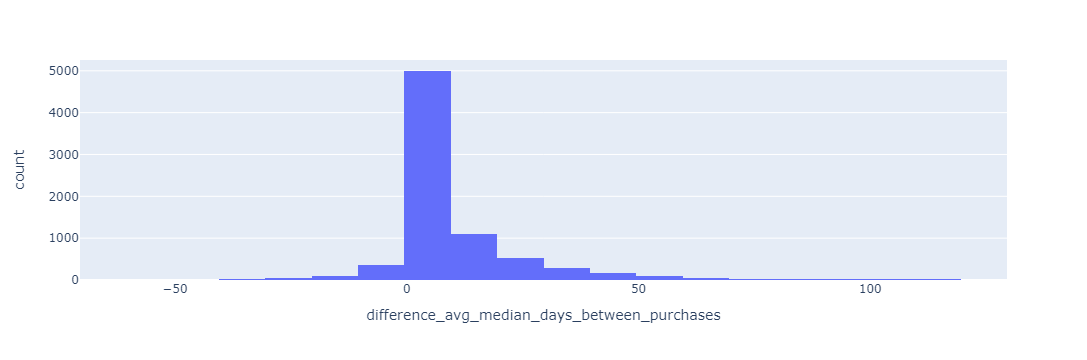

In [447]:
px.histogram(df, x = 'difference_avg_median_days_between_purchases', nbins = 30)

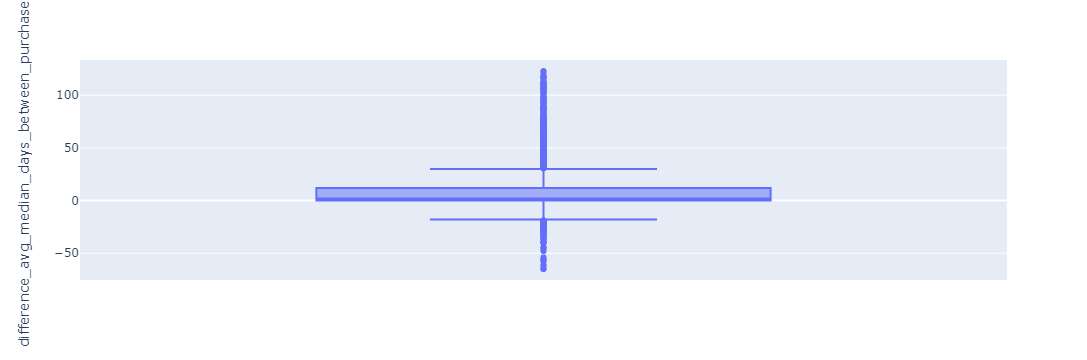

In [448]:
px.box(df['difference_avg_median_days_between_purchases'], y = 'difference_avg_median_days_between_purchases')

In [449]:
lower_fence = -18
q1 = np.percentile(df[pd.isnull(df['difference_avg_median_days_between_purchases']) == False]['difference_avg_median_days_between_purchases'], 25)
q2 = np.median(df[pd.isnull(df['difference_avg_median_days_between_purchases']) == False]['difference_avg_median_days_between_purchases'])
q3 = np.percentile(df[pd.isnull(df['difference_avg_median_days_between_purchases']) == False]['difference_avg_median_days_between_purchases'], 75)
upper_fence = 30

In [450]:
df['qualitative_difference_avg_median_days_between_purchases'] = df['difference_avg_median_days_between_purchases']\
                                                                 .apply(lambda x: np.NaN if pd.isnull(x) == True else 
                                                                                 ('Negative outlier' if x < lower_fence else 
                                                                                 ('Below Q1' if x >= lower_fence and x < q1 else 
                                                                                 ('Between Q1 and below median' if x >= q1 and x < q2 else 
                                                                                 ('Between Q2 and below Q3' if x >= q2 and x < q3 else 
                                                                                 ('Between Q3 and lower fence' if x >= q3 and x <= lower_fence else 
                                                                                 ('Positive outlier')))))))

In [451]:
df[['qualitative_difference_avg_median_days_between_purchases', 'USER_ID']].groupby(['qualitative_difference_avg_median_days_between_purchases']).count().reset_index()

qualitative_difference_avg_median_days_between_purchases  USER_ID
0                                           Below Q1            435
1                        Between Q1 and below median           3325
2                            Between Q2 and below Q3           1973
3                                   Negative outlier             73
4                                   Positive outlier           2026

### Based on average delivery distance in km

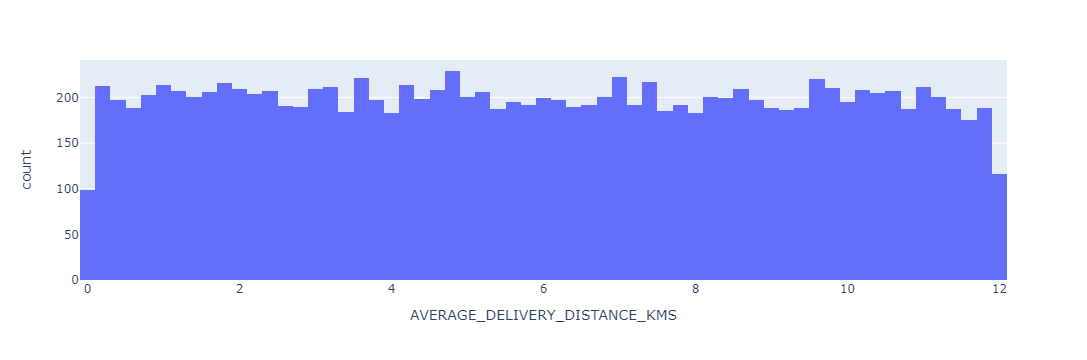

In [452]:
px.histogram(df, x = 'AVERAGE_DELIVERY_DISTANCE_KMS')

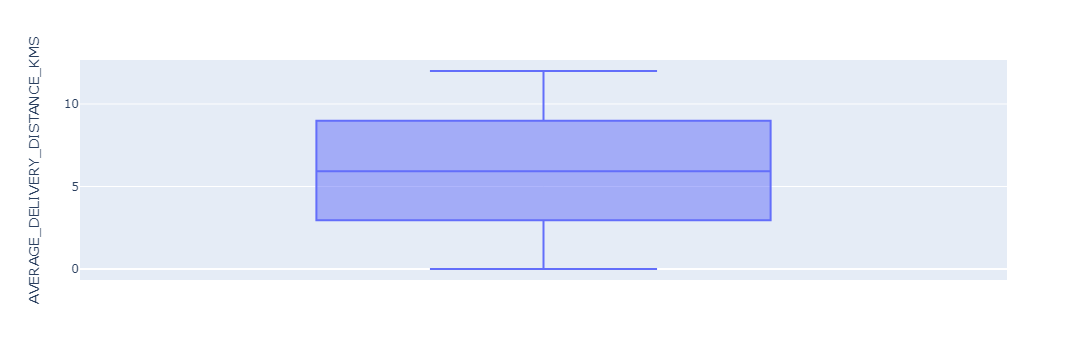

In [453]:
px.box(df['AVERAGE_DELIVERY_DISTANCE_KMS'], y = 'AVERAGE_DELIVERY_DISTANCE_KMS')

In [454]:
minimum = min(df[pd.isnull(df['AVERAGE_DELIVERY_DISTANCE_KMS']) == False]['AVERAGE_DELIVERY_DISTANCE_KMS'])
q1 = np.percentile(df[pd.isnull(df['AVERAGE_DELIVERY_DISTANCE_KMS']) == False]['AVERAGE_DELIVERY_DISTANCE_KMS'], 25)
q2 = np.median(df[pd.isnull(df['AVERAGE_DELIVERY_DISTANCE_KMS']) == False]['AVERAGE_DELIVERY_DISTANCE_KMS'])
q3 = np.percentile(df[pd.isnull(df['AVERAGE_DELIVERY_DISTANCE_KMS']) == False]['AVERAGE_DELIVERY_DISTANCE_KMS'], 75)
maximum = max(df[pd.isnull(df['AVERAGE_DELIVERY_DISTANCE_KMS']) == False]['AVERAGE_DELIVERY_DISTANCE_KMS'])

In [455]:
df['AVERAGE_DELIVERY_DISTANCE_KMS_qualitative'] = df['AVERAGE_DELIVERY_DISTANCE_KMS']\
                                                  .apply(lambda x: np.NaN if pd.isnull(x) == True else 
                                                                  ('Between min value and below Q1' if x >= minimum and x < q1 else 
                                                                  ('Between Q1 and below median' if x >= q1 and x < q2 else 
                                                                  ('Between median and below Q3' if x >= q2 and x < q3 else 
                                                                  ('Between Q3 and max value')))))

In [461]:
df[['AVERAGE_DELIVERY_DISTANCE_KMS_qualitative', 'USER_ID']].groupby(['AVERAGE_DELIVERY_DISTANCE_KMS_qualitative']).count().reset_index()

AVERAGE_DELIVERY_DISTANCE_KMS_qualitative  USER_ID
0               Between Q1 and below median     3007
1                  Between Q3 and max value     3008
2               Between median and below Q3     3006
3            Between min value and below Q1     3007

### Based on store type

In [456]:
for i in ('General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store'):
    df['bin_' + i] = df[i].apply(lambda x: 1 if x > 0 else 0)

In [457]:
df['distinct_store_types_bought'] = df[['bin_General merchandise',
                                        'bin_Grocery',
                                        'bin_Pet supplies',
                                        'bin_Restaurant',
                                        'bin_Retail store']].apply(lambda x: sum(x), axis = 1)

In [458]:
df[['distinct_store_types_bought', 'USER_ID']].groupby('distinct_store_types_bought').count().reset_index()

distinct_store_types_bought  USER_ID
0                            0     9955
1                            1     8554
2                            2     1857
3                            3     1617

In [459]:
px.bar(df[['USER_ID', 'distinct_store_types_bought']].groupby('distinct_store_types_bought').count().reset_index(), x = 'distinct_store_types_bought', y = 'USER_ID')

In [460]:
px.bar(df[['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']].sum().reset_index(),
       x = 'index', y = 0, title='Number of purchases per store type')